### Steps:

1. convert Newick format tree to distance matrix
2. use scipy. . get linkage matrix... from distance matrix
3. use DendroHeatMap package to generate the figure...
https://github.com/themantalope/pydendroheatmap



In [229]:
%matplotlib inline
from ete3 import Tree

In [230]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [231]:
tree = Tree('/Users/qingpeng/GoogleDrive/Development/Bitbucket/genelearn_paper/Script/family_newick.txt',format=1)
leaves = tree.get_leaf_names()

In [232]:
tax_list_file = open("/Users/qingpeng/GoogleDrive/Development/Bitbucket/genelearn_paper/Script/all.vect.family.index.tax_id",'r')
idx_dict = {}
k = 0
for line in tax_list_file:
    line = line.rstrip()
    idx_dict[line] = k
    k += 1
    
    

idx_labels = [idx_dict.keys()[idx_dict.values().index(i)] for i in range(0, len(idx_dict))]

In [233]:
len(idx_labels)

811

In [17]:
tree.get_distance('3173','4710')

15.0

In [ ]:
dmat = np.zeros((811,811))
k = 0
for l1 in leaves:
    for l2 in leaves:
        if l2 != l1:
            

            d = tree.get_distance(l1,l2)
        #if l1 in idx_dict and l2 in idx_dict:
            dmat[idx_dict[l1],idx_dict[l2]] = dmat[idx_dict[l2],idx_dict[l1]] = d
     #   else:
      #      print l1,l2
    print l1,k
    k += 1
print 'Distance:'
print dmat

In [21]:
len(dmat)

811

In [39]:
np.savetxt("family_dmat.txt",dmat)

In [120]:
schlink = sch.linkage(scipy.spatial.distance.squareform(dmat),method='average',metric='euclidean')

print 'Linkage from scipy:'
print schlink

Linkage from scipy:
[[    0.           477.             0.             2.        ]
 [    5.             7.             2.             2.        ]
 [    8.            11.             2.             2.        ]
 ..., 
 [ 1616.          1617.            27.40509389   523.        ]
 [ 1609.          1615.            27.42231884   288.        ]
 [ 1618.          1619.            32.4539914    811.        ]]


In [234]:
import pydendroheatmap as pdh

In [235]:
import pandas as pd

In [236]:
matrix = pd.read_csv('../../Pipeline/MultiClass/Family/matrix.txt',sep = '\s+',header=None)

In [237]:
df2 = matrix.div(matrix.sum(axis=1),axis=0)

In [238]:
data = df2.values

In [239]:
len(data)

811

In [240]:
row_idxing = sch.leaves_list(schlink)
col_idxing = sch.leaves_list(schlink)

In [126]:
s = pd.Series(col_idxing)

In [127]:
d = pd.DataFrame({'family':s})

In [164]:
leaves_np = np.array(leaves, dtype='i')

In [176]:
len(leaves_np)

810

In [167]:
leaves_pd = pd.DataFrame({'real_tax_id':pd.Series(leaves_np)})

In [169]:
out = pd.merge(leaves_pd,group,how='left',on=['real_tax_id'])

In [197]:
matrix = {'group':pd.Series(['euk','bact','arch','virus']),'family_group':pd.Series(['--------','-----','---','-'])}

In [198]:
matrix_df = pd.DataFrame(matrix)

In [199]:
matrix_df

family_group  group
0     --------    euk
1        -----   bact
2          ---   arch
3            -  virus

In [178]:
out2= pd.merge(out,family,how='left',on=['real_tax_id'])

In [200]:
out3 = pd.merge(out2,matrix_df,how='left',on=['group'])

In [210]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)

height has been deprecated.



In [206]:
group_label = out3['family_group']

In [204]:
out2_family = out2['family']

In [129]:
family = pd.read_csv("../../Pipeline/MultiClass/all.vect.family.index", sep=" ",names = ['family','real_tax_id'])

In [131]:
new_leaf_order = pd.merge(d,family,how='left',on=['family'])

In [152]:
group = pd.read_csv("../../Pipeline/MultiClass/family_group.list", sep=" ",names = ['real_tax_id','group'])

In [135]:
tax_id_group = pd.merge(new_leaf_order,group,how='left',on=['real_tax_id'])

In [140]:
pd.set_option('display.max_rows', 100)

In [173]:
# from conversion

data_scipy = data[:,col_idxing][row_idxing,:]

In [183]:
data_ete = data[:,out2_family][out2_family,:]


In [241]:
data_ete

array([[ 0.10404624,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03571429,  0.        ,  0.00595238, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01038961,  0.0025974 ,  0.01818182, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.91623037,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.66896552]])

In [293]:
data_ete_zoom = data_ete[520:,520:]

In [294]:
data_ete_zoom

array([[ 0.        ,  0.27      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.72151899,  0.0464135 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.02076677,  0.21405751, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.91623037,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.66896552]])

In [251]:
row = [0] *(len(data_ete))

In [261]:
diag =np.array([row]*5,dtype=np.float)

In [262]:
diag

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [263]:
for i in range(len(data_ete)):
    for k in range(5):
        diag[k][i] = data_ete[i][i]

In [264]:
diag

array([[ 0.10404624,  0.        ,  0.01818182, ...,  0.91623037,
         1.        ,  0.66896552],
       [ 0.10404624,  0.        ,  0.01818182, ...,  0.91623037,
         1.        ,  0.66896552],
       [ 0.10404624,  0.        ,  0.01818182, ...,  0.91623037,
         1.        ,  0.66896552],
       [ 0.10404624,  0.        ,  0.01818182, ...,  0.91623037,
         1.        ,  0.66896552],
       [ 0.10404624,  0.        ,  0.01818182, ...,  0.91623037,
         1.        ,  0.66896552]])

In [265]:
diag_df= pd.DataFrame(diag,columns=group_label)

In [266]:
diag_df

family_group  --------  --------  --------  --------  --------  --------  \
0             0.104046       0.0  0.018182       0.0   0.16568       0.0   
1             0.104046       0.0  0.018182       0.0   0.16568       0.0   
2             0.104046       0.0  0.018182       0.0   0.16568       0.0   
3             0.104046       0.0  0.018182       0.0   0.16568       0.0   
4             0.104046       0.0  0.018182       0.0   0.16568       0.0   

family_group  --------  --------  --------  --------    ...       -    -  \
0             0.014493       0.0       0.0  0.015094    ...     1.0  1.0   
1             0.014493       0.0       0.0  0.015094    ...     1.0  1.0   
2             0.014493       0.0       0.0  0.015094    ...     1.0  1.0   
3             0.014493       0.0       0.0  0.015094    ...     1.0  1.0   
4             0.014493       0.0       0.0  0.015094    ...     1.0  1.0   

family_group         -         -    -         -         -        -    -  \
0             0.998951  0.947644  1.0  0.988685  0.927512  0.91623  1.0   
1             0.998951  0.947644  1.0  0.988685  0.927512  0.91623  1.0   
2             0.998951  0.947644  1.0  0.988685  0.927512  0.91623  1.0   
3             0.998951  0.947644  1.0  0.988685  0.927512  0.91623  1.0   
4             0.998951  0.947644  1.0  0.988685  0.927512  0.91623  1.0   

family_group         -  
0             0.668966  
1             0.668966  
2             0.668966  
3             0.668966  
4             0.668966  

[5 rows x 810 columns]

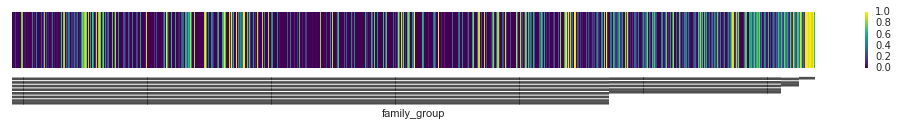

In [275]:
fig, ax = plt.subplots(figsize= (18,1))
heat_plot = sns.heatmap(diag_df,xticklabels=True,yticklabels=False,cmap = plt.cm.viridis)

In [276]:
fig.savefig("heatmap_family_diagonal.png")

In [296]:
data_ete_zoom_df = pd.DataFrame(data_ete_zoom,index=group_label[520:],columns=group_label[520:])

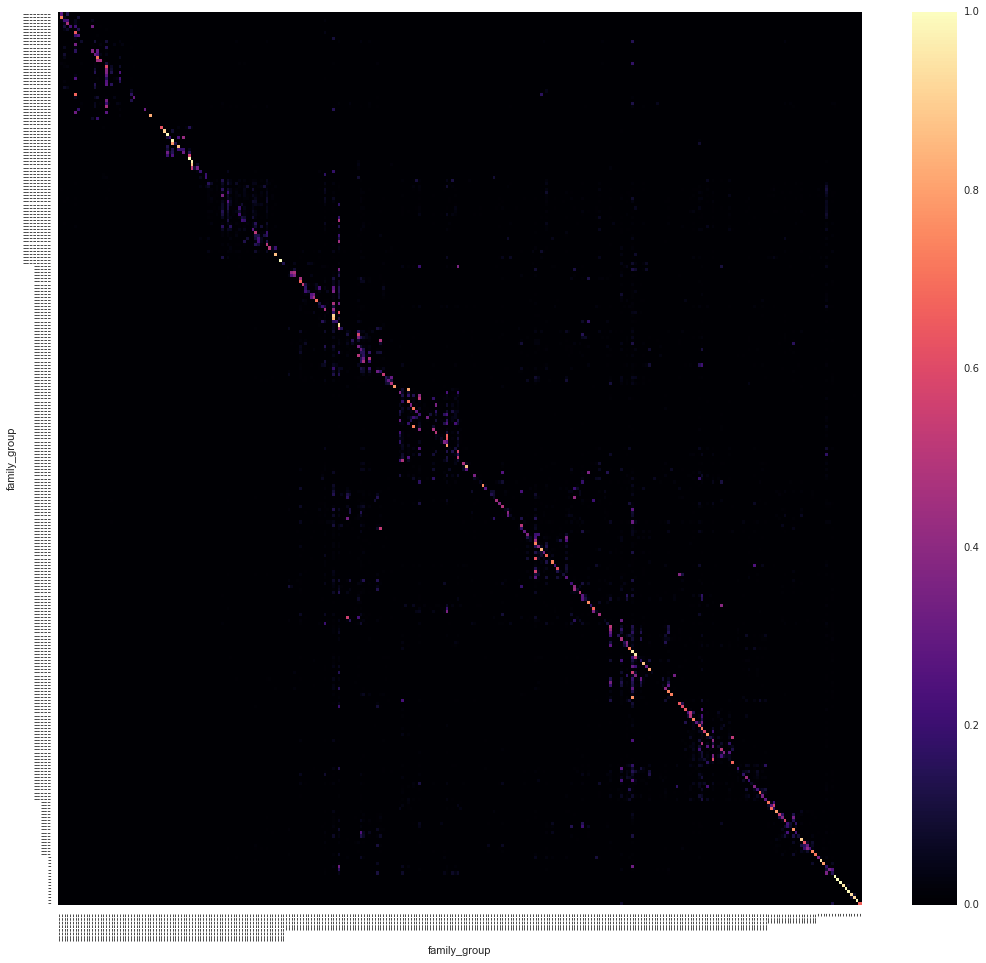

In [302]:
fig, ax = plt.subplots(figsize= (18,16))
heat_plot = sns.heatmap(data_ete_zoom_df,xticklabels=True,yticklabels=True,cmap = plt.cm.magma)

In [304]:
fig.savefig("heatmap_family_zoom_plant_cutoff_magma.pdf")

In [207]:
ete_df = pd.DataFrame(data_ete,index=group_label,columns=group_label)

In [287]:
string=""""Lipothrixviridae Alloherpesviridae Herpesviridae
Siphoviridae
Myoviridae
Podoviridae
Rhabdoviridae Paramyxoviridae
Filoviridae
Coronaviridae
Secoviridae
Picornaviridae Dicistroviridae Alphaflexiviridae Betaflexiviridae Tymoviridae Nitrosopumilaceae Sulfolobaceae Thermoproteaceae Pyrodictiaceae Desulfurococcaceae Methanobacteriaceae Archaeoglobaceae Thermococcaceae Ferroplasmaceae Methanomassiliicoccaceae Methanococcaceae Methanocaldococcaceae Halobacteriaceae Haloferacaceae Natrialbaceae Methanosarcinaceae Methanomicrobiaceae Methanoregulaceae Nitrospiraceae Synergistaceae Deferribacteraceae Spirochaetaceae Chrysiogenaceae Thermodesulfobacteriaceae Fusobacteriaceae Leptotrichiaceae Holophagaceae Acidobacteriaceae Desulfurobacteriaceae Aquificaceae Hydrogenothermaceae Kosmotogaceae Thermotogaceae Fervidobacteriaceae Planctomycetaceae Verrucomicrobiaceae Opitutaceae Parachlamydiaceae Chlamydiaceae Chlorobiaceae Sphingobacteriaceae Rhodothermaceae Chitinophagaceae Saprospiraceae Flavobacteriaceae Cryomorphaceae Amoebophilaceae Cytophagaceae Flammeovirgaceae Cyclobacteriaceae Porphyromonadaceae Prolixibacteraceae Prevotellaceae Marinilabiliaceae Rikenellaceae
Thermaceae
Sphaerobacteraceae
Rivulariaceae
Nostocaceae
Microchaetaceae
Acholeplasmataceae
Entomoplasmataceae
Mycoplasmataceae
Acidimicrobiaceae
Eggerthellaceae
Coriobacteriaceae
Atopobiaceae
Micromonosporaceae
Pseudonocardiaceae
Actinomycetaceae
Glycomycetaceae
Geodermatophilaceae
Streptomycetaceae
Bifidobacteriaceae
Nocardioidaceae
Propionibacteriaceae
Nocardiopsaceae
Streptosporangiaceae
Thermomonosporaceae
Nocardiaceae
Corynebacteriaceae
Mycobacteriaceae
Promicromonosporaceae
Dermacoccaceae
Dermabacteraceae
Micrococcaceae
Dermatophilaceae
Microbacteriaceae
Intrasporangiaceae
Cellulomonadaceae
Peptoniphilaceae
Erysipelotrichaceae
Acidaminococcaceae
Veillonellaceae
Halanaerobiaceae
Halobacteroidaceae
Thermoanaerobacterales Family III Incertae Sedis Thermodesulfobiaceae Thermoanaerobacteraceae
Clostridiaceae
Lachnospiraceae
Peptococcaceae Syntrophomonadaceae Peptostreptococcaceae Ruminococcaceae
Eubacteriaceae
Clostridiales Family XIII Incertae Sedis Clostridiales Family XVII Incertae Sedis Aerococcaceae
Enterococcaceae Carnobacteriaceae Leuconostocaceae Streptococcaceae Lactobacillaceae Bacillaceae Paenibacillaceae Thermoactinomycetaceae Staphylococcaceae Alicyclobacillaceae Listeriaceae Planococcaceae Sporolactobacillaceae Gallionellaceae Hydrogenophilaceae Methylophilaceae Rhodocyclaceae Nitrosomonadaceae Chromobacteriaceae Neisseriaceae Alcaligenaceae Sutterellaceae Oxalobacteraceae Comamonadaceae Burkholderiaceae Nautiliaceae Campylobacteraceae Helicobacteraceae Geobacteraceae Syntrophaceae Desulfurellaceae Desulfobacteraceae Desulfobulbaceae Desulfovibrionaceae Desulfohalobiaceae Polyangiaceae Myxococcaceae Cystobacteraceae Caulobacteraceae Anaplasmataceae Rickettsiaceae Sphingomonadaceae Erythrobacteraceae Acetobacteraceae Rhodospirillaceae Hyphomonadaceae Rhodobacteraceae Rhodobiaceae Xanthobacteraceae Hyphomicrobiaceae Aurantimonadaceae Brucellaceae Phyllobacteriaceae Methylocystaceae Rhizobiaceae Methylobacteriaceae Beijerinckiaceae Bradyrhizobiaceae Methylococcaceae Sinobacteraceae Cardiobacteriaceae Xanthomonadaceae Enterobacteriaceae Pasteurellaceae Vibrionaceae
Orbaceae
Moraxellaceae Pseudomonadaceae Ectothiorhodospiraceae Chromatiaceae Piscirickettsiaceae Thiotrichaceae Coxiellaceae Legionellaceae Aeromonadaceae Succinivibrionaceae Colwelliaceae Pseudoalteromonadaceae Alteromonadaceae Alcanivoracaceae Oceanospirillaceae Halomonadaceae Hahellaceae
Euglenaceae Trypanosomatidae Gracilariaceae Bangiaceae
Cyanidiaceae Peridiniaceae Sarcocystidae Haemoproteidae Saprolegniaceae Chattonellaceae Sargassaceae Scytosiphonaceae Laminariaceae Thalassiosiraceae Fragilariaceae Bacillariaceae Bathycoccaceae Chlorellaceae Neochloridaceae Selenastraceae Chlamydomonadaceae Volvocaceae Klebsormidiaceae Characeae Zygnemataceae Mesotaeniaceae Orthotrichaceae Funariaceae Grimmiaceae Lycopodiaceae Pteridaceae Ophioglossaceae Cycadaceae
Zamiaceae
Pinaceae
Cupressaceae
Taxaceae
Araucariaceae Podocarpaceae Nymphaeaceae Magnoliaceae
Araceae Hydrocharitaceae Orchidaceae Zingiberaceae
Poaceae
Arecaceae
Melanthiaceae
Liliaceae Alstroemeriaceae Trochodendraceae Ranunculaceae Berberidaceae Amaranthaceae Caryophyllaceae Primulaceae Campanulaceae Asteraceae
Apiaceae
Araliaceae
Apocynaceae Convolvulaceae Solanaceae Lentibulariaceae Lamiaceae
Oleaceae
Orobanchaceae Brassicaceae
Malvaceae
Myrtaceae
Geraniaceae Melianthaceae
Fabaceae
Rosaceae
Cucurbitaceae
Fagaceae
Salicaceae Euphorbiaceae Chrysobalanaceae Blastocladiaceae Gigasporaceae Glomeraceae Ustilaginaceae Tremellaceae
Coriolaceae Polyporaceae Dipodascaceae Phaffomycetaceae Saccharomycetaceae Debaryomycetaceae Pichiaceae
Orbiliaceae Pleosporaceae Mycosphaerellaceae Herpotrichiellaceae Aspergillaceae Ajellomycetaceae Arthrodermataceae Sclerotiniaceae Cordycipitaceae Clavicipitaceae Magnaporthaceae Sordariaceae Chaetomiaceae Plakinidae
Spongiidae
Axinellidae
Spongillidae Lubomirskiidae Coralliidae
Nephtheidae
Alcyoniidae
Actiniidae Corallimorphidae Discosomatidae Mussidae
Caryophylliidae Dendrophylliidae Pocilloporidae Acroporidae
Agariciidae
Siderastreidae
Poritidae
Microcotylidae
Dugesiidae Diphyllobothriidae Taeniidae Schistosomatidae Paramphistomidae Dicrocoeliidae Opisthorchiidae Heterophyidae Oligacanthorhynchidae Laqueidae
Lineidae Emplectonematidae Prosorhochmidae Megascolecidae Hirudinidae
Nereididae
Siboglinidae
Polyceridae
Mopaliidae Lepidochitonidae Nautilidae
Octopodidae
Sepiidae
Loliginidae Ommastrephidae Unionidae
Ostreidae
Pectinidae
Arcidae
Mytilidae
Hiatellidae
Lucinidae
Cardiidae
Veneridae
Mactridae
Solecurtidae Psammobiidae Mermithidae Aphelenchoididae Oxyuridae
Anisakidae
Ascarididae
Thelaziidae Onchocercidae Ancylostomatidae Angiostrongylidae Strongylidae
Cloacinidae Trichostrongylidae Haemonchidae Hypsibiidae
Limulidae
Ammotheidae
Buthidae
Phalangiidae
Ricinoididae
Acaridae
Phytoseiidae
Ixodidae
Argasidae
Liphistiidae
Araneidae
Salticidae
Lycosidae
Balanidae
Chthamalidae
Penaeidae
Lithodidae
Upogebiidae Callianassidae
Scyllaridae
Palinuridae
Nephropidae Parastacidae
Cambaridae Alvinocarididae Palaemonidae
Atyidae
Raninidae
Varunidae
Bythograeidae
Portunidae Acerentomidae Campodeidae
Japygidae
Machilidae
Libellulidae Calopterygidae
Perlidae
Phasmatidae
Termitidae
Termopsidae Rhinotermitidae Tettigoniidae
Gryllidae
Tetrigidae
Pneumoridae Pyrgomorphidae Acrididae
Pamphagidae Philopteridae
Thripidae
Psyllidae
Aleyrodidae
Aphididae
Cercopidae
Cicadellidae
Fulgoridae
Delphacidae
Peloridiidae
Reduviidae
Tingidae
Miridae
Nabidae
Rhopalidae
Aradidae
Malcidae
Plataspidae
Pentatomidae Corydalidae Myrmeleontidae Ascalaphidae Chrysopidae Tenthredinidae Braconidae
Apidae
Formicidae
Vespidae
Carabidae
Scarabaeidae
Lampyridae
Buprestidae Tenebrionidae Curculionidae Cerambycidae Chrysomelidae Trichoceridae Cecidomyiidae
Culicidae
Tephritidae
Muscidae
Tachinidae
Calliphoridae
Oestridae
Sarcophagidae Hepialidae
Tortricidae
Geometridae
Hesperiidae
Pyralidae
Crambidae
Bombycidae
Sphingidae
Saturniidae
Noctuidae
Lymantriidae
Nolidae
Erebidae
Notodontidae
Papilionidae
Lycaenidae
Nymphalidae
Riodinidae
Pieridae
Sagittidae
Spadellidae
Antedonidae
Asteriidae
Stichopodidae
Echinidae Strongylocentrotidae Ascidiidae
Styelidae
Pyuridae Petromyzontidae Myxinidae
Chimaeridae Rhinochimaeridae Hexanchidae
Squalidae
Alopiidae
Triakidae
Carcharhinidae Rhinobatidae
Pristidae
Arhynchobatidae
Rajidae
Myliobatidae Potamotrygonidae Dasyatidae
Polypteridae Acipenseridae Polyodontidae Lepisosteidae
Albulidae
Derichthyidae
Chlopsidae Synaphobranchidae Serrivomeridae Muraenidae Nettastomatidae Ophichthidae Muraenesocidae Nemichthyidae
Congridae
Notopteridae
Mormyridae Osteoglossidae Alepocephalidae Platytroctidae
Engraulidae
Clupeidae
Pristigasteridae
Kneriidae
Cyprinidae
Cobitidae
Catostomidae
Balitoridae
Nemacheilidae Citharinidae Prochilodontidae Alestidae
Bryconidae
Characidae Serrasalmidae Loricariidae
Sisoridae
Pimelodidae
Bagridae
Doradidae Auchenipteridae Pangasiidae
Siluridae
Osmeridae
Salangidae
Salmonidae
Umbridae
Galaxiidae
Ateleopodidae Synodontidae Neoscopelidae Myctophidae Trachipteridae
Gadidae
Macrouridae
Zeidae
Oreosomatidae Holocentridae Melamphaidae
Diretmidae
Cetomimidae
Ophidiidae
Bythitidae Mastacembelidae Osphronemidae Channidae
Apogonidae
Gobiidae
Odontobutidae
Eleotridae
Callionymidae
Mullidae
Centriscidae
Pegasidae
Syngnathidae
Nomeidae
Bramidae
Gempylidae
Stromateidae Chiasmodontidae Centrolophidae Scombridae
Trichiuridae
Cichlidae
Mugilidae
Blenniidae
Gobiesocidae Atherinopsidae
Belonidae
Exocoetidae
Poeciliidae Cyprinodontidae Istiophoridae
Carangidae Pleuronectidae
Citharidae
Achiridae
Soleidae
Bothidae
Samaridae Rhombosoleidae Paralichthyidae Cynoglossidae Chaetodontidae Pentacerotidae
Labridae
Acanthuridae
Sparidae
Lethrinidae
Lophiidae
Gigantactinidae Ceratiidae
Diceratiidae Percichthyidae
Cirrhitidae
Kyphosidae
Terapontidae Centrarchidae Sinipercidae
Molidae
Triacanthidae Triacanthodidae Ostraciidae
Aracanidae Tetraodontidae Diodontidae Monacanthidae
Balistidae
Serranidae
Percidae
Sebastidae Channichthyidae Nototheniidae Anoplopomatidae Cottidae
Hexagrammidae Aulorhynchidae Gasterosteidae Herpelidae Typhlonectidae Indotyphlidae Scolecomorphidae Caeciliidae
Siphonopidae Ichthyophiidae Dermophiidae
Hynobiidae Plethodontidae Salamandridae
Proteidae
Megophryidae
Pipidae
Alytidae
Bufonidae
Microhylidae Calyptocephalellidae Rhacophoridae Dicroglossidae
Ranidae
Tachyglossidae Caenolestidae Didelphidae
Dasyuridae
Peramelidae Phalangeridae Macropodidae
Petauridae Macroscelididae Procaviidae
Elephantidae
Leporidae
Octodontidae Bathyergidae
Echimyidae
Sciuridae
Cricetidae
Muridae
Spalacidae
Galagidae
Lorisidae
Cheirogaleidae Lemuridae
Lepilemuridae
Indriidae
Cercopithecidae Hylobatidae
Hominidae
Cebidae
Pitheciidae
Atelidae
Rhinocerotidae Pteropodidae Vespertilionidae Phyllostomidae
Talpidae
Erinaceidae
Soricidae
Balaenidae Balaenopteridae Delphinidae
Phocoenidae Physeteridae
Ziphiidae
Hyaenidae
Felidae
Viverridae
Mustelidae
Canidae
Phocidae
Ursidae
Otariidae
Procyonidae
Mephitidae Phyllodactylidae Eublepharidae Gekkonidae Amphisbaenidae Lacertidae
Anguidae
Iguanidae
Agamidae Chamaeleonidae Typhlopidae
Colubridae
Viperidae
Elapidae
Dipsadidae
Chelidae
Pelomedusidae Trionychidae
Testudinidae
Emydidae
Geoemydidae Cheloniidae
Chelydridae Kinosternidae Alligatoridae
Gavialidae
Crocodylidae
Tinamidae
Emeidae
Rheidae
Columbidae
Trogonidae
Podicipedidae Spheniscidae
Apodidae
Picidae
Trochilidae
Alcedinidae
Bucerotidae
Cuculidae
Accipitridae
Falconidae
Cacatuidae
Psittacidae
Procellariidae Diomedeidae
Strigidae
Tytonidae
Rallidae
Otididae
Gruidae
Ardeidae Phalacrocoracidae Threskiornithidae Charadriidae Scolopacidae
Laridae
Anatidae
Phasianidae
Numididae
Thraupidae
Tyrannidae
Turdidae
Sturnidae
Leiothrichidae Hirundinidae
Corvidae
Petroicidae
Muscicapidae
Paridae
Sylviidae
Certhiidae
Fringillidae
Passeridae
Icteridae
Estrildidae
￼"""

In [289]:
list = string.split()

In [290]:
list.index("Chrysobalanaceae")

298

In [291]:
list[298]

'Chrysobalanaceae'

In [292]:
len(list)

823

### Group families together

0-601  -  'euk'  '--------'

602-775   'bact'   '-----'

776-793   'arch'   '---'

794-809   'virus'   '-'


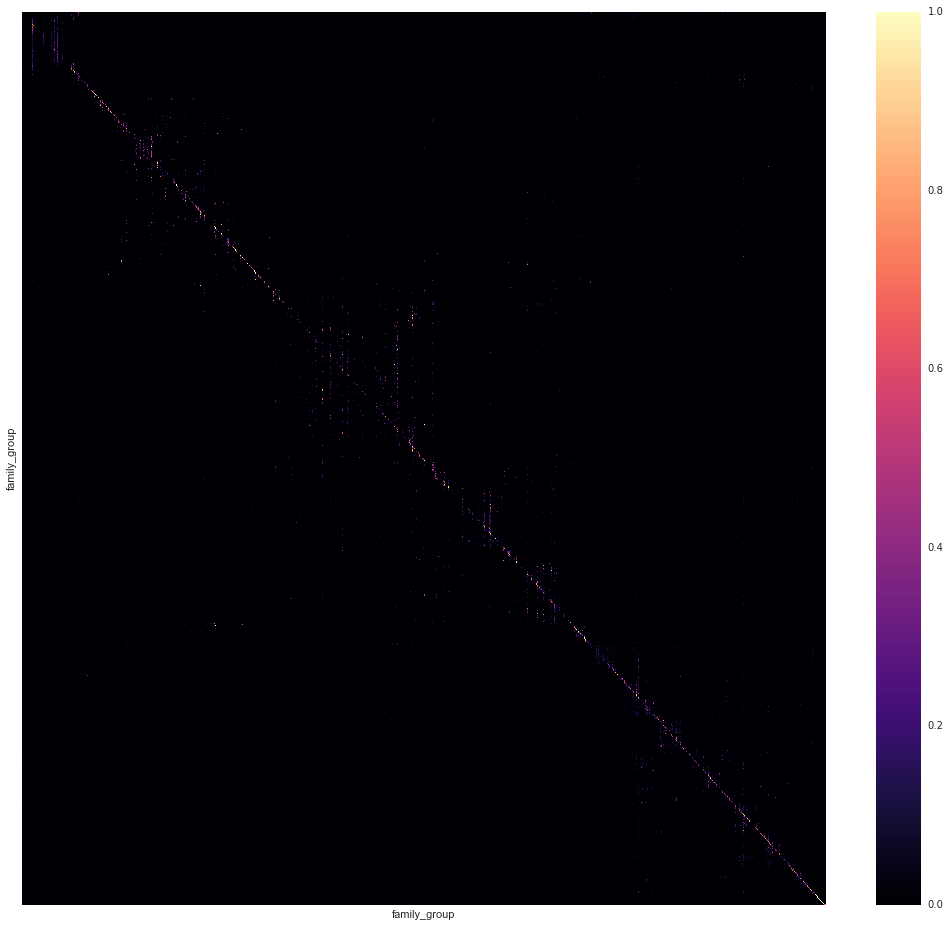

In [300]:
import seaborn as sns
fig, ax = plt.subplots(figsize= (18,16))
heat_plot = sns.heatmap(ete_df,xticklabels=False,yticklabels=False,cmap = plt.cm.magma)

In [228]:
fig.savefig("heatmap_family_only.pdf")

#### Align the heatmap to taxonomic tree



0-165: euk

166-339:bact

340-355 virus

356-373: arch

374-810: euk



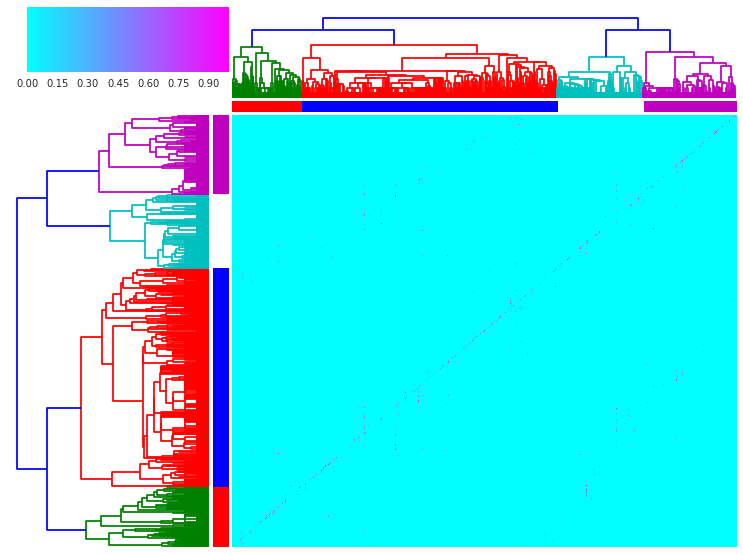

In [214]:
    heatmap = pdh.DendroHeatMap(heat_map_data=data, left_dendrogram=schlink, top_dendrogram=schlink)
    #heatmap.row_labels = row_labels
    #heatmap.col_labels = col_labels
 #   heatmap.title = 'An example heatmap'
    heatmap.colormap = plt.cm.cool
 #   heatmap.colormap = plt.cm.Blues
 #   heatmap.colormap = heatmap.yellowBlackBlue
    heatmap.show()

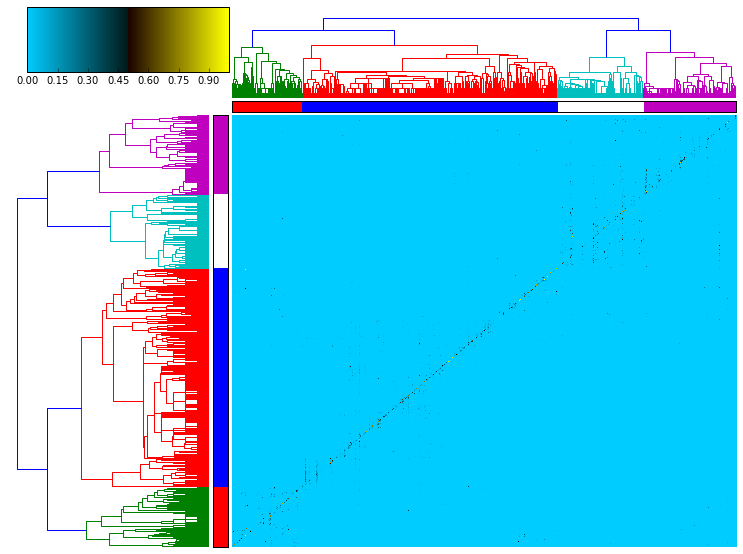

In [38]:
 #   heatmap.colormap = plt.cm.viridis
#heatmap.colormap = plt.cm.Blues
heatmap.colormap = heatmap.yellowBlackBlue
heatmap.show()

### Original heatmap

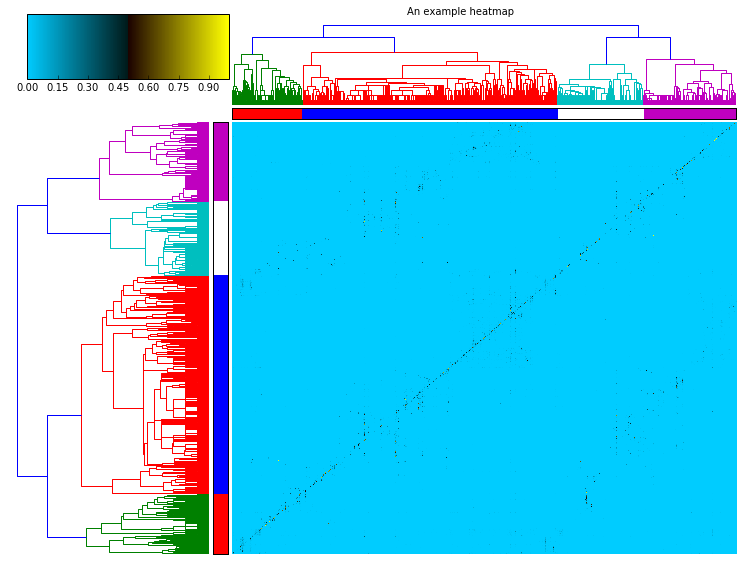

In [33]:
    heatmap = pdh.DendroHeatMap(heat_map_data=df2.values, left_dendrogram=schlink, top_dendrogram=schlink)
    #heatmap.row_labels = row_labels
    #heatmap.col_labels = col_labels
    heatmap.title = 'An example heatmap'
 #   heatmap.colormap = plt.cm.Blues
    heatmap.colormap = heatmap.yellowBlackBlue
    heatmap.show()